In [4]:
import cartpole
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

sns.set()

## Random policy

100%|██████████| 100/100 [00:00<00:00, 8509.27it/s]


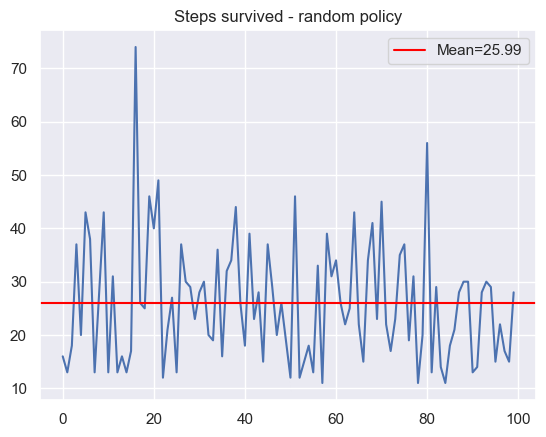

In [10]:
if __name__ == "__main__":
    
    #random policy

    nb_episodes = 100

    random_env = cartpole.CartPoleEnv(3)
    scores = [0]*nb_episodes
    steps_history = [0]*nb_episodes
    for i in tqdm(range(nb_episodes)):
        random_env.reset()
        done = False
        steps = 0
        while not done:
            #env.render()
            steps+=1
            observation, reward, done, info = random_env.step(random_env.action_space.sample())
            scores[i] += reward
        steps_history[i] = steps
    plt.plot(steps_history)
    mean = np.mean(steps_history)
    plt.title("Steps survived - random policy")
    plt.axhline(mean, label=f"Mean={mean}", color="red")
    plt.legend()

    random_env.close()

## Do-nothing policy

100%|██████████| 100/100 [00:00<00:00, 8852.85it/s]


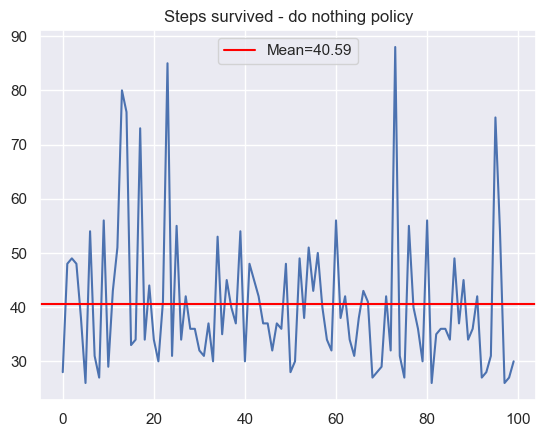

In [12]:
if __name__ == "__main__":
    #do nothing policy

    nb_episodes = 100

    env = cartpole.CartPoleEnv(3)
    scores = [0]*nb_episodes
    steps_history = [0]*nb_episodes
    for i in tqdm(range(nb_episodes)):
        env.reset()
        done = False
        steps = 0
        while not done:
            #env.render()
            steps+=1
            observation, reward, done, info = env.step(2)
            scores[i] += reward
        steps_history[i] = steps
    plt.plot(steps_history)
    mean = np.mean(steps_history)
    plt.title("Steps survived - do nothing policy")
    plt.axhline(mean, label=f"Mean={mean}", color="red")
    plt.legend()

    env.close()

## Position-focused policy

100%|██████████| 100/100 [00:00<00:00, 5828.09it/s]


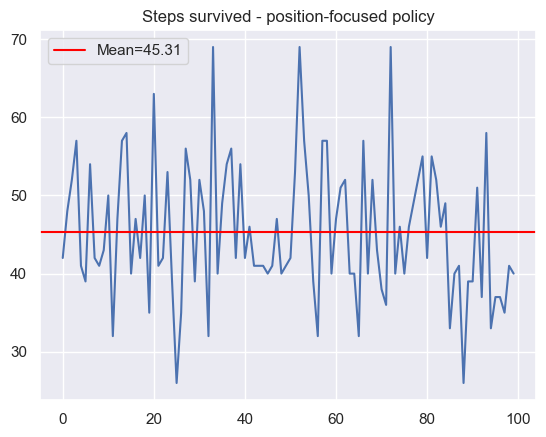

In [27]:
if __name__ == "__main__":
    nb_episodes = 100

    env = cartpole.CartPoleEnv(3)
    scores = [0]*nb_episodes
    steps_history = [0]*nb_episodes
    for i in tqdm(range(nb_episodes)):
        env.reset()
        observation, reward, done, info = env.step(2)
        done = False
        steps = 1
        while not done:
            #env.render()
            steps+=1
            if observation[2] < 0:
                observation, reward, done, info = env.step(0)
            else:
                observation, reward, done, info = env.step(1)
            scores[i] += reward
        steps_history[i] = steps
    plt.plot(steps_history)
    mean = np.mean(steps_history)
    plt.title("Steps survived - position-focused policy")
    plt.axhline(mean, label=f"Mean={mean}", color="red")
    plt.legend()

    env.close()

## Angular-speed-focused policy

100%|██████████| 100/100 [00:00<00:00, 1427.45it/s]


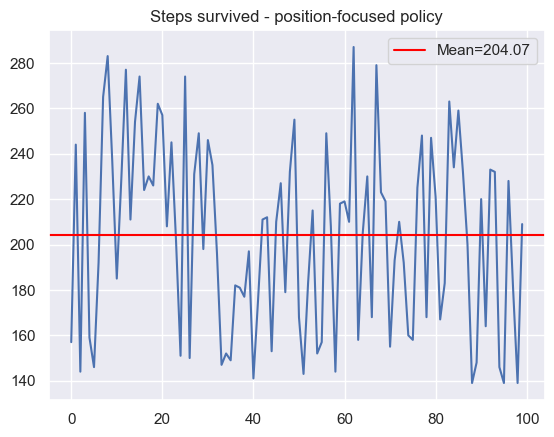

In [28]:
if __name__ == "__main__":
    nb_episodes = 100

    env = cartpole.CartPoleEnv(3)
    scores = [0]*nb_episodes
    steps_history = [0]*nb_episodes
    for i in tqdm(range(nb_episodes)):
        env.reset()
        observation, reward, done, info = env.step(2)
        done = False
        steps = 1
        while not done:
            #env.render()
            steps+=1
            if observation[3] < 0:
                observation, reward, done, info = env.step(0)
            else:
                observation, reward, done, info = env.step(1)
            scores[i] += reward
        steps_history[i] = steps
    plt.plot(steps_history)
    mean = np.mean(steps_history)
    plt.title("Steps survived - position-focused policy")
    plt.axhline(mean, label=f"Mean={mean}", color="red")
    plt.legend()

    env.close()

## corrected Angular-speed-focused policy

100%|██████████| 100/100 [00:00<00:00, 110.55it/s]


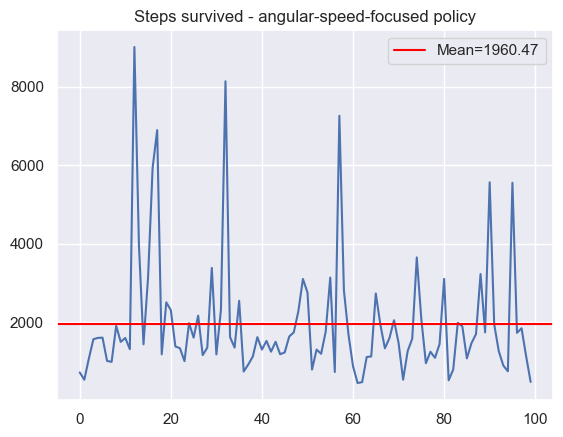

In [29]:
if __name__ == "__main__":
    nb_episodes = 100
    epsilon = 0.1


    env = cartpole.CartPoleEnv(3)
    scores = [0]*nb_episodes
    steps_history = [0]*nb_episodes
    for i in tqdm(range(nb_episodes)):
        env.reset()
        observation, reward, done, info = env.step(2)
        done = False
        steps = 1
        while not done:
            #env.render()
            steps+=1
            if np.abs(observation[3]) > epsilon:
                if observation[3] < 0:
                    observation, reward, done, info = env.step(0)
                else:
                    observation, reward, done, info = env.step(1)
            else:
                if observation[2] < 0:
                    observation, reward, done, info = env.step(0)
                else:
                    observation, reward, done, info = env.step(1)
            scores[i] += reward
        steps_history[i] = steps
    plt.plot(steps_history)
    mean = np.mean(steps_history)
    plt.title("Steps survived - angular-speed-focused policy")
    plt.axhline(mean, label=f"Mean={mean}", color="red")
    plt.legend()

    env.close()